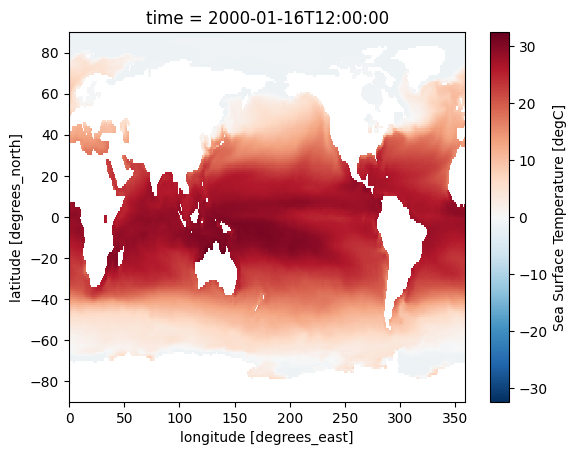

In [7]:
from smmregrid import CdoGenerate, Regridder
import os
import xarray as xr
import subprocess

indir='tests/data'
tgrid='r360x180'
cdo = '/opt/homebrew/Caskroom/mambaforge/base/envs/smmregrid/bin/cdo'
tfile = os.path.join(indir, 'r360x180.nc')
ifile=os.path.join(indir, 'onlytos-ipsl.nc')
weights=os.path.join(indir, 'weights.nc')
remap = os.path.join(indir, 'remapcon.nc')
env = os.environ.copy()
for file in [weights, remap]:
    if os.path.exists(file):
        os.remove(file) 
command1 = f'{cdo} gencon,{tgrid} {ifile} {weights}'
#env['REMAP_AREA_MIN'] = '0.1'
subprocess.check_output(command1, env=env, shell=True)
command2 = f'{cdo} remap,{tgrid},{weights} {ifile} {remap}'
subprocess.check_output(command2, shell=True, env=env)
cdofield = xr.open_dataset(remap)
cdofield['tos'].isel(time=0).plot()


<xarray.Dataset> Size: 3MB
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 96B 2000-01-16T12:00:00 ... 2000-12-16T1...
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B ...
    tos        (time, lat, lon) float32 3MB ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 2.4.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    creation_date:          2018-07-11T07:36:14Z
    tracking_id:            hdl:21.14100/01f4d96a-9054-4974-b8dd-4f91e73989d2
    ...                     ...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Thu Jan 30 17:01:35 2025: cdo remap,r360x180,test...
    NCO:                    "4.6.0"
    CDO:                    Climate Data Operators version 2.4.4 (https://mpi...

2025-01-30 16:33:06 | smmregrid.CdoGenerate |     INFO -> CDO remapping method: con
2025-01-30 16:33:06 | smmregrid.CdoGenerate |     INFO -> Extrapolation enabled: True
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Normalization method: fracarea
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Minimum remap area: 0.5
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Weight file name is: /var/folders/fh/1h2_kz3d55zfmjg0pvnclzxw0000gn/T/tmpljq81psf
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Source grid file name is: tests/data/onlytos-ipsl.nc
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Target grid file name is: tests/data/r360x180.nc
2025-01-30 16:33:06 | smmregrid.CdoGenerate |    DEBUG -> Environment variables: {'COMMAND_MODE': 'unix2003', 'CONDA_DEFAULT_ENV': 'smmregrid', 'CONDA_EXE': '/opt/homebrew/Caskroom/mambaforge/base/bin/conda', 'CONDA_PREFIX': '/opt/homebrew/Caskroom/mambaforge/base/envs/smmregrid', 'CONDA_PROMPT_MODIF

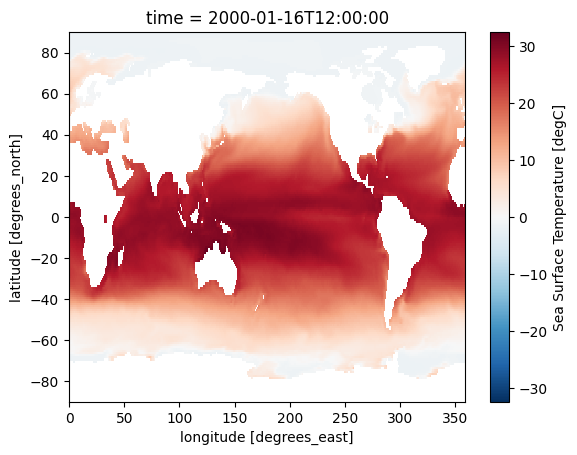

In [2]:
xfield = xr.open_mfdataset(ifile)
wfield = CdoGenerate(ifile, tfile, loglevel='debug').weights(method = 'con', remap_area_min=0.5, remap_norm='fracarea')
interpolator = Regridder(weights=wfield)
rfield = interpolator.regrid(xfield)
rfield['tos'].isel(time=0).plot()